In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameters for experiment

# To add?
# Probability of having a sequence (<=1)
# Probability of detecting a spike in the sequence (<=1) a.k.a. partial sequence

# Constant
nr_neurons = 50
FR_var = 0. # Spikeship ttest does not work if FR_var > 0 
trial_len = 0.1
seq_len = 0.04
mean_delay = 0.03 # (timing of sequence relative to trial)

# Variable
nr_trials = np.arange(10, 300)
neurons_in_seq = np.arange(2, 15)
jitter = np.linspace(0, 0.05, 100)
delay_var = np.linspace(0, 0.03, 100)
avg_FR = np.linspace(2, 25, 100)

# Default parameters
nr_trials_ = 100
neurons_in_seq_ = 5
jitter_ = 0.01
delay_var_ = 0.01
avg_FR_ = 10

# Time-locked

## Number of trials

In [3]:
# Load results
URI_scores = np.load("Results/nr_trials/URI_scores.npy")
p_vals = np.load("Results/nr_trials/p_vals.npy")
surr_avgs = np.load("Results/nr_trials/surr_avgs.npy")
surr_95s = np.load("Results/nr_trials/surr_95s.npy")
URI_scores_ = np.load("Results/nr_trials/URI_scores_.npy")
p_vals_ = np.load("Results/nr_trials/p_vals_.npy")
surr_avgs_ = np.load("Results/nr_trials/surr_avgs_.npy")
surr_95s_ = np.load("Results/nr_trials/surr_95s_.npy")
spikeship_tscores = np.load("Results/nr_trials/spikeship_tscores.npy")
spikeship_pvals = np.load("Results/nr_trials/spikeship_pvals.npy")

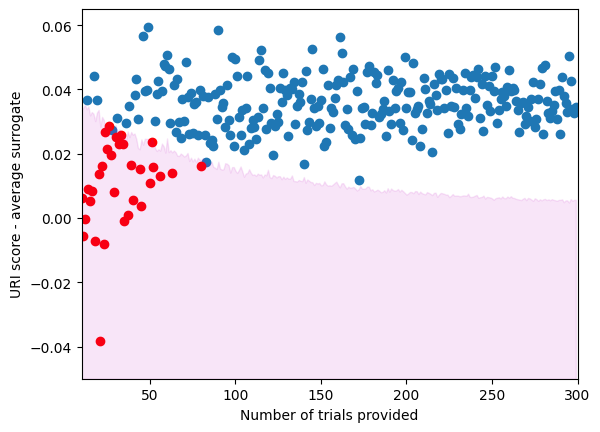

In [4]:
# Experiment
plt.figure()
mask_sign = p_vals.flatten() < 0.05
rel_URI = URI_scores - surr_avgs
rel_95 = surr_95s - surr_avgs
plt.scatter(np.repeat(nr_trials, 1)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(nr_trials, 1)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(np.repeat(nr_trials, 1), -0.05, rel_95.flatten(), color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Number of trials provided")
plt.ylabel("URI score - average surrogate")

plt.xlim(10, 300)
plt.ylim(-0.05, 0.065)
plt.savefig("Results/nr_trials/plot_nr_trials.png")
plt.show()

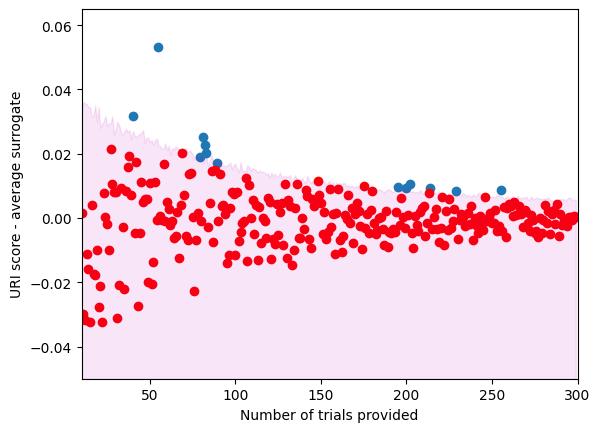

In [5]:
# Control
plt.figure()
mask_sign = p_vals_.flatten() < 0.05
rel_URI = URI_scores_ - surr_avgs_
rel_95 = surr_95s_ - surr_avgs_
plt.scatter(np.repeat(nr_trials, 1)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(nr_trials, 1)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(np.repeat(nr_trials, 1), -0.05, rel_95.flatten(), color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Number of trials provided")
plt.ylabel("URI score - average surrogate")

plt.xlim(10, 300)
plt.ylim(-0.05, 0.065)
plt.savefig("Results/nr_trials/plot_nr_trials_.png")
plt.show()

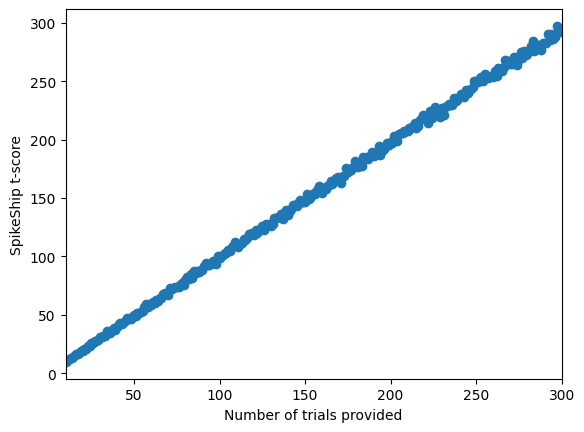

In [6]:
# Spikeship
plt.figure()
mask_sign = spikeship_pvals.flatten() < 0.05
plt.scatter(nr_trials[mask_sign], np.abs(spikeship_tscores[mask_sign]), label="experiment SpikeShip t-score ($p < 0.05$)")
plt.scatter(nr_trials[~mask_sign], np.abs(spikeship_tscores[~mask_sign]), color="r", label="experiment SpikeShip t-score ($p \geq 0.05$)")
#plt.fill_between(jitter, -1.96, 1.96, color='m', alpha=0.1, label="t-score 95% confidence")
plt.xlabel("Number of trials provided")
plt.ylabel("SpikeShip t-score")
plt.xlim(10, 300)
plt.savefig("Results/nr_trials/spikeship.png")
plt.show()

## Number of spikes in sequence

In [7]:
# Load results
URI_scores = np.load("Results/neurons_in_seq/URI_scores.npy")
p_vals = np.load("Results/neurons_in_seq/p_vals.npy")
surr_avgs = np.load("Results/neurons_in_seq/surr_avgs.npy")
surr_95s = np.load("Results/neurons_in_seq/surr_95s.npy")
URI_scores_ = np.load("Results/neurons_in_seq/URI_scores_.npy")
p_vals_ = np.load("Results/neurons_in_seq/p_vals_.npy")
surr_avgs_ = np.load("Results/neurons_in_seq/surr_avgs_.npy")
surr_95s_ = np.load("Results/neurons_in_seq/surr_95s_.npy")
spikeship_tscores = np.load("Results/neurons_in_seq/spikeship_tscores.npy")
spikeship_pvals = np.load("Results/neurons_in_seq/spikeship_pvals.npy")

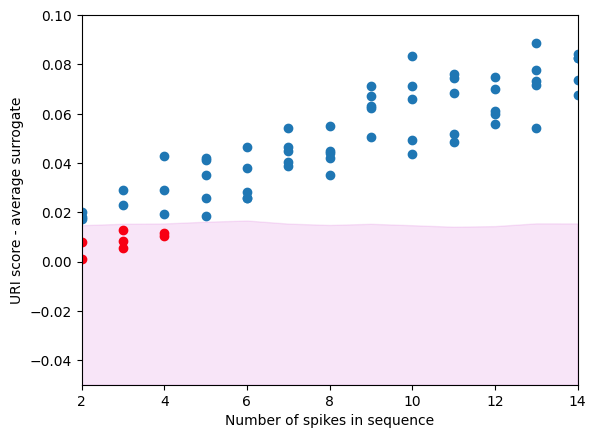

In [8]:
plt.figure()
mask_sign = p_vals.flatten() < 0.05
rel_URI = URI_scores - surr_avgs
rel_95 = surr_95s - surr_avgs
plt.scatter(np.repeat(neurons_in_seq, 5)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(neurons_in_seq, 5)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(neurons_in_seq, -0.05, rel_95[:, 0], color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Number of spikes in sequence")
plt.ylabel("URI score - average surrogate")

plt.xlim(2, 14)
plt.ylim(-0.05, 0.1)
plt.savefig("Results/neurons_in_seq/plot_neurons.png")
plt.show()

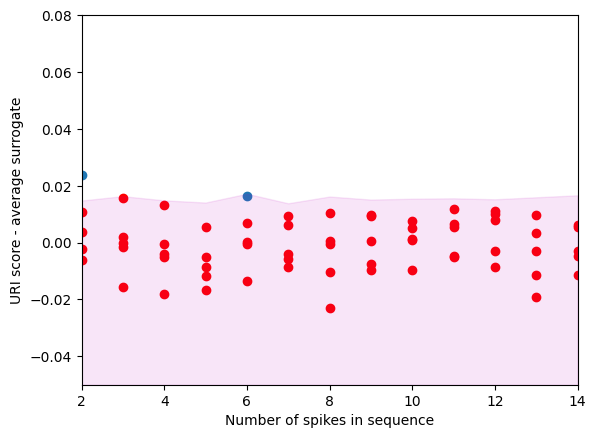

In [9]:
plt.figure()
mask_sign = p_vals_.flatten() < 0.05
rel_URI = URI_scores_ - surr_avgs_
rel_95 = surr_95s_ - surr_avgs_
plt.scatter(np.repeat(neurons_in_seq, 5)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(neurons_in_seq, 5)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(neurons_in_seq, -0.05, rel_95[:, 0], color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Number of spikes in sequence")
plt.ylabel("URI score - average surrogate")

plt.xlim(2, 14)
plt.ylim(-0.05, 0.08)
plt.savefig("Results/neurons_in_seq/plot_neurons.png")
plt.show()

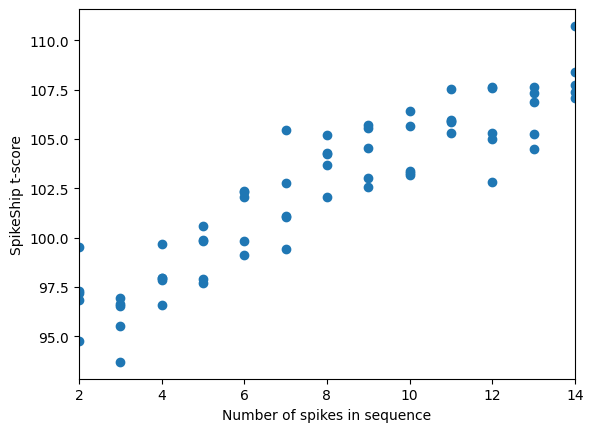

In [10]:
# Spikeship
plt.figure()
mask_sign = spikeship_pvals.flatten() < 0.05
plt.scatter(np.repeat(neurons_in_seq, 5)[mask_sign], np.abs(spikeship_tscores.flatten()[mask_sign]), label="experiment SpikeShip t-score ($p < 0.05$)")
plt.scatter(np.repeat(neurons_in_seq, 5)[~mask_sign], np.abs(spikeship_tscores.flatten()[~mask_sign]), color="r", label="experiment SpikeShip t-score ($p \geq 0.05$)")
#plt.fill_between(jitter, -1.96, 1.96, color='m', alpha=0.1, label="t-score 95% confidence")
plt.xlabel("Number of spikes in sequence")
plt.ylabel("SpikeShip t-score")
plt.xlim(2, 14)
plt.savefig("Results/neurons_in_seq/spikeship.png")
plt.show()

## Jitter

In [11]:
# Load results
URI_scores = np.load("Results/jitter/URI_scores.npy")
p_vals = np.load("Results/jitter/p_vals.npy")
surr_avgs = np.load("Results/jitter/surr_avgs.npy")
surr_95s = np.load("Results/jitter/surr_95s.npy")
URI_scores_ = np.load("Results/jitter/URI_scores_.npy")
p_vals_ = np.load("Results/jitter/p_vals_.npy")
surr_avgs_ = np.load("Results/jitter/surr_avgs_.npy")
surr_95s_ = np.load("Results/jitter/surr_95s_.npy")
spikeship_tscores = np.load("Results/jitter/spikeship_tscores.npy")
spikeship_pvals = np.load("Results/jitter/spikeship_pvals.npy")

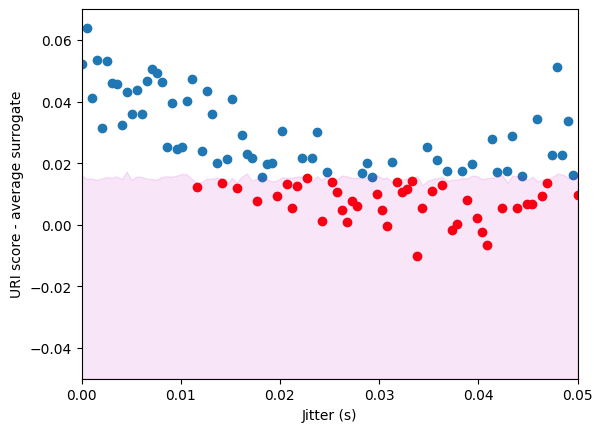

In [12]:
plt.figure()
mask_sign = p_vals.flatten() < 0.05
rel_URI = URI_scores - surr_avgs
rel_95 = surr_95s - surr_avgs
plt.scatter(np.repeat(jitter, 1)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(jitter, 1)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(np.repeat(jitter, 1), -0.05, rel_95.flatten(), color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Jitter (s)")
plt.ylabel("URI score - average surrogate")

plt.xlim(0, 0.05)
plt.ylim(-0.05, 0.07)
plt.savefig("Results/jitter/plot_jitter.png")
plt.show()

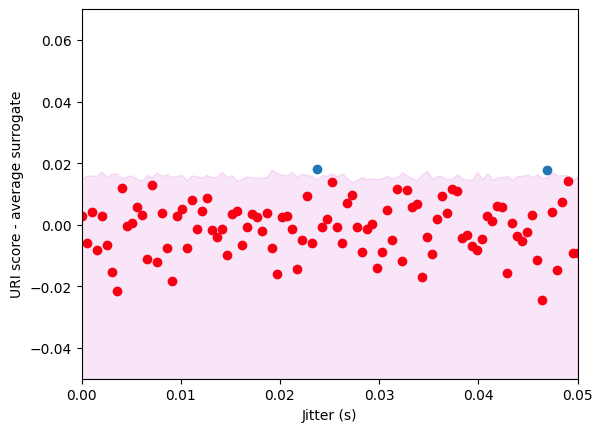

In [13]:
plt.figure()
mask_sign = p_vals_.flatten() < 0.05
rel_URI = URI_scores_ - surr_avgs_
rel_95 = surr_95s_ - surr_avgs_
plt.scatter(np.repeat(jitter, 1)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(jitter, 1)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(np.repeat(jitter, 1), -0.05, rel_95.flatten(), color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Jitter (s)")
plt.ylabel("URI score - average surrogate")

plt.xlim(0, 0.05)
plt.ylim(-0.05, 0.07)
plt.savefig("Results/jitter/plot_jitter_.png")
plt.show()

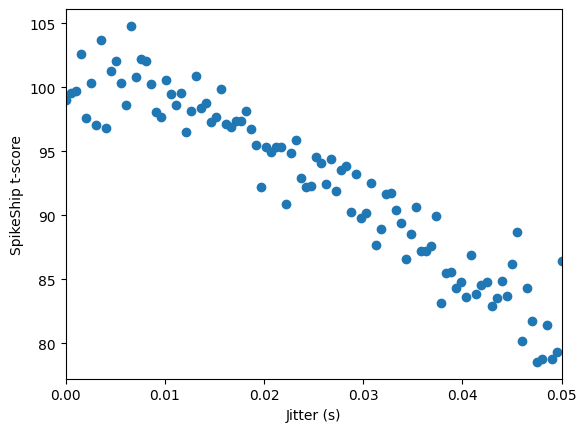

In [14]:
# Spikeship
plt.figure()
mask_sign = spikeship_pvals.flatten() < 0.05
plt.scatter(jitter[mask_sign], np.abs(spikeship_tscores[mask_sign]), label="experiment SpikeShip t-score ($p < 0.05$)")
plt.scatter(jitter[~mask_sign], np.abs(spikeship_tscores[~mask_sign]), color="r", label="experiment SpikeShip t-score ($p \geq 0.05$)")
#plt.fill_between(jitter, -1.96, 1.96, color='m', alpha=0.1, label="t-score 95% confidence")
plt.xlabel("Jitter (s)")
plt.ylabel("SpikeShip t-score")
plt.xlim(0, 0.05)
plt.savefig("Results/jitter/spikeship.png")
plt.show()

## Delay variation

In [15]:
# Load results
URI_scores = np.load("Results/delay_var/URI_scores.npy")
p_vals = np.load("Results/delay_var/p_vals.npy")
surr_avgs = np.load("Results/delay_var/surr_avgs.npy")
surr_95s = np.load("Results/delay_var/surr_95s.npy")
URI_scores_ = np.load("Results/delay_var/URI_scores_.npy")
p_vals_ = np.load("Results/delay_var/p_vals_.npy")
surr_avgs_ = np.load("Results/delay_var/surr_avgs_.npy")
surr_95s_ = np.load("Results/delay_var/surr_95s_.npy")
spikeship_tscores = np.load("Results/delay_var/spikeship_tscores.npy")
spikeship_pvals = np.load("Results/delay_var/spikeship_pvals.npy")

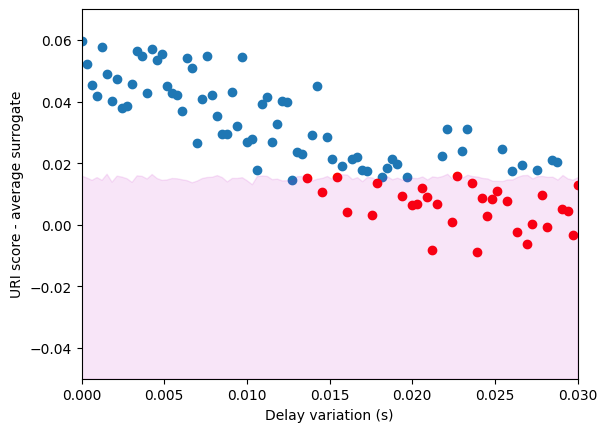

In [16]:
plt.figure()
mask_sign = p_vals.flatten() < 0.05
rel_URI = URI_scores - surr_avgs
rel_95 = surr_95s - surr_avgs
plt.scatter(np.repeat(delay_var, 1)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(delay_var, 1)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(np.repeat(delay_var, 1), -0.05, rel_95.flatten(), color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Delay variation (s)")
plt.ylabel("URI score - average surrogate")

plt.xlim(0, 0.03)
plt.ylim(-0.05, 0.07)
plt.savefig("Results/delay_var/delay_var.png")
plt.show()

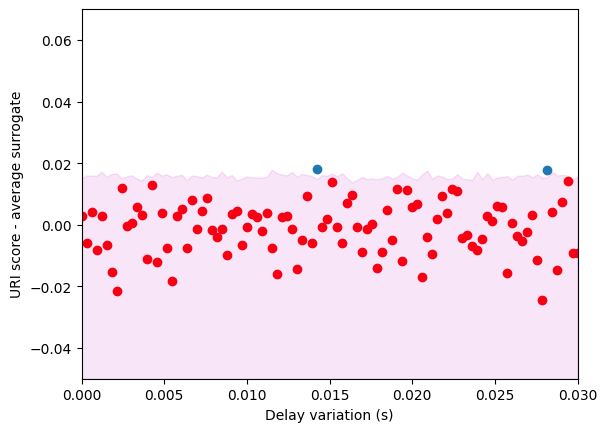

In [17]:
plt.figure()
mask_sign = p_vals_.flatten() < 0.05
rel_URI = URI_scores_ - surr_avgs_
rel_95 = surr_95s_ - surr_avgs_
plt.scatter(np.repeat(delay_var, 1)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(delay_var, 1)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(np.repeat(delay_var, 1), -0.05, rel_95.flatten(), color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Delay variation (s)")
plt.ylabel("URI score - average surrogate")

plt.xlim(0, 0.03)
plt.ylim(-0.05, 0.07)
plt.savefig("Results/delay_var/delay_var_.png")
plt.show()

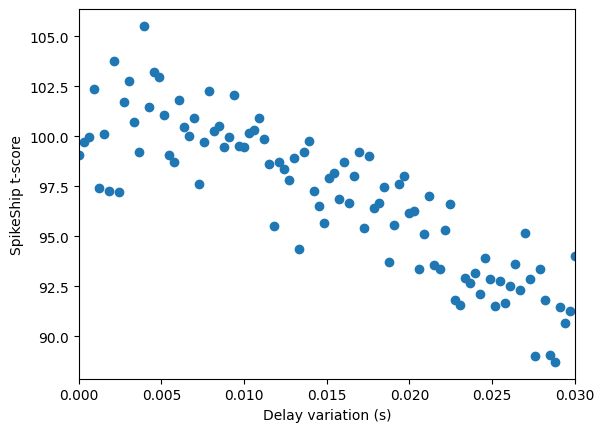

In [18]:
# Spikeship
plt.figure()
mask_sign = spikeship_pvals.flatten() < 0.05
plt.scatter(delay_var[mask_sign], np.abs(spikeship_tscores[mask_sign]), label="experiment SpikeShip t-score ($p < 0.05$)")
plt.scatter(delay_var[~mask_sign], np.abs(spikeship_tscores[~mask_sign]), color="r", label="experiment SpikeShip t-score ($p \geq 0.05$)")
#plt.fill_between(jitter, -1.96, 1.96, color='m', alpha=0.1, label="t-score 95% confidence")
plt.xlabel("Delay variation (s)")
plt.ylabel("SpikeShip t-score")
plt.xlim(0, 0.03)
plt.savefig("Results/delay_var/spikeship.png")
plt.show()

## Average background firing rate

In [19]:
# Load results
URI_scores = np.load("Results/avg_FR/URI_scores.npy")
p_vals = np.load("Results/avg_FR/p_vals.npy")
surr_avgs = np.load("Results/avg_FR/surr_avgs.npy")
surr_95s = np.load("Results/avg_FR/surr_95s.npy")
URI_scores_ = np.load("Results/avg_FR/URI_scores_.npy")
p_vals_ = np.load("Results/avg_FR/p_vals_.npy")
surr_avgs_ = np.load("Results/avg_FR/surr_avgs_.npy")
surr_95s_ = np.load("Results/avg_FR/surr_95s_.npy")
spikeship_tscores = np.load("Results/avg_FR/spikeship_tscores.npy")
spikeship_pvals = np.load("Results/avg_FR/spikeship_pvals.npy")

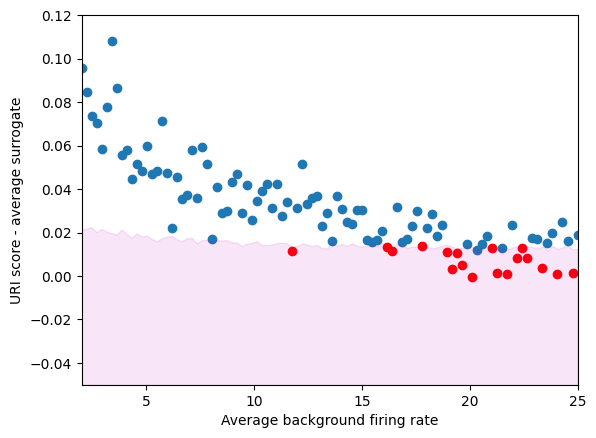

In [20]:
plt.figure()
mask_sign = p_vals.flatten() < 0.05
rel_URI = URI_scores - surr_avgs
rel_95 = surr_95s - surr_avgs
plt.scatter(np.repeat(avg_FR, 1)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(avg_FR, 1)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(np.repeat(avg_FR, 1), -0.05, rel_95.flatten(), color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Average background firing rate")
plt.ylabel("URI score - average surrogate")

plt.xlim(2, 25)
plt.ylim(-0.05, 0.12)
plt.savefig("Results/avg_FR/avg_FR.png")
plt.show()

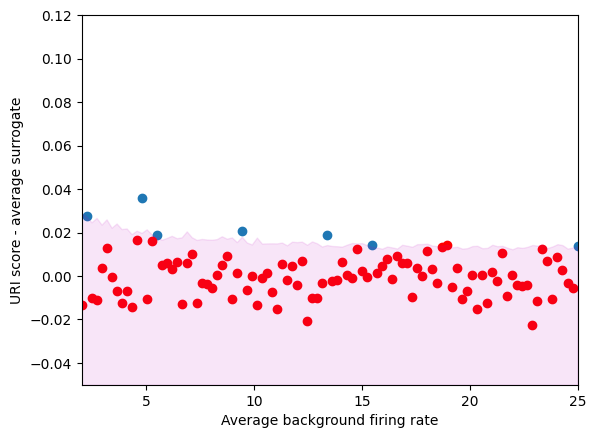

In [21]:
plt.figure()
mask_sign = p_vals_.flatten() < 0.05
rel_URI = URI_scores_ - surr_avgs_
rel_95 = surr_95s_ - surr_avgs_
plt.scatter(np.repeat(avg_FR, 1)[mask_sign], rel_URI.flatten()[mask_sign], label="experiment URI score ($p < 0.05$)")
plt.scatter(np.repeat(avg_FR, 1)[~mask_sign], rel_URI.flatten()[~mask_sign], color="r", label="experiment URI score ($p \geq 0.05$)")
plt.fill_between(np.repeat(avg_FR, 1), -0.05, rel_95.flatten(), color='m', alpha=0.1, label="surrogate 95% confidence")
plt.xlabel("Average background firing rate")
plt.ylabel("URI score - average surrogate")

plt.xlim(2, 25)
plt.ylim(-0.05, 0.12)
plt.savefig("Results/avg_FR/avg_FR_.png")
plt.show()

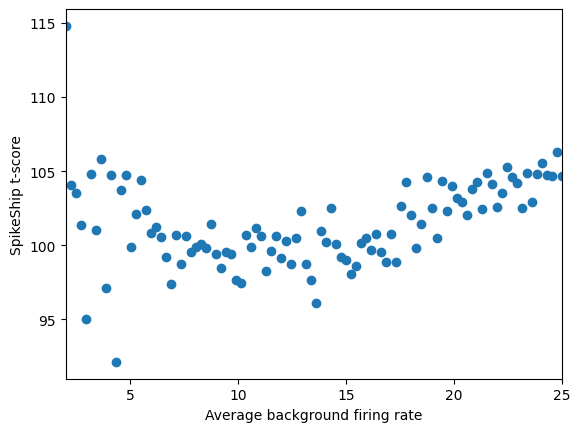

In [22]:
# Spikeship
plt.figure()
mask_sign = spikeship_pvals.flatten() < 0.05
plt.scatter(avg_FR[mask_sign], np.abs(spikeship_tscores[mask_sign]), label="experiment SpikeShip t-score ($p < 0.05$)")
plt.scatter(avg_FR[~mask_sign], np.abs(spikeship_tscores[~mask_sign]), color="r", label="experiment SpikeShip t-score ($p \geq 0.05$)")
#plt.fill_between(jitter, -1.96, 1.96, color='m', alpha=0.1, label="t-score 95% confidence")
plt.xlabel("Average background firing rate")
plt.ylabel("SpikeShip t-score")
plt.xlim(2, 25)
plt.savefig("Results/avg_FR/spikeship.png")
plt.show()

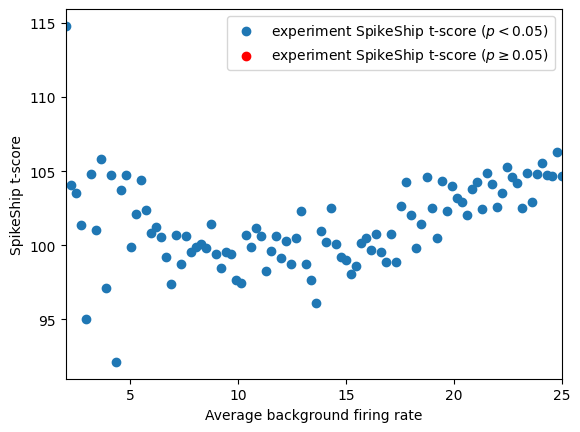

In [23]:
# Spikeship
plt.figure()
mask_sign = spikeship_pvals.flatten() < 0.05
plt.scatter(avg_FR[mask_sign], np.abs(spikeship_tscores[mask_sign]), label="experiment SpikeShip t-score ($p < 0.05$)")
plt.scatter(avg_FR[~mask_sign], np.abs(spikeship_tscores[~mask_sign]), color="r", label="experiment SpikeShip t-score ($p \geq 0.05$)")
#plt.fill_between(jitter, -1.96, 1.96, color='m', alpha=0.1, label="t-score 95% confidence")
plt.xlabel("Average background firing rate")
plt.ylabel("SpikeShip t-score")
plt.xlim(2, 25)
plt.legend()
plt.show()

# Interaction

## Number of trials with background FR

In [133]:
# Load results
URI_scores = np.load("Results/interaction1/URI_scores.npy")
p_vals = np.load("Results/interaction1/p_vals.npy")
surr_avgs = np.load("Results/interaction1/surr_avgs.npy")
surr_95s = np.load("Results/interaction1/surr_95s.npy")
URI_scores_ = np.load("Results/interaction1/URI_scores_.npy")
p_vals_ = np.load("Results/interaction1/p_vals_.npy")
surr_avgs_ = np.load("Results/interaction1/surr_avgs_.npy")
surr_95s_ = np.load("Results/interaction1/surr_95s_.npy")
spikeship_tscores = np.load("Results/interaction1/spikeship_tscores.npy")
spikeship_pvals = np.load("Results/interaction1/spikeship_pvals.npy")

In [134]:
nr_trials_ie = np.arange(20, 320, 20)
avg_FR_ie = np.linspace(2, 25, 15)

In [135]:
from matplotlib.colors import Normalize
norm1 = Normalize(vmin=0, vmax=0.1)
norm2 = Normalize(vmin=-0.05, vmax=0)

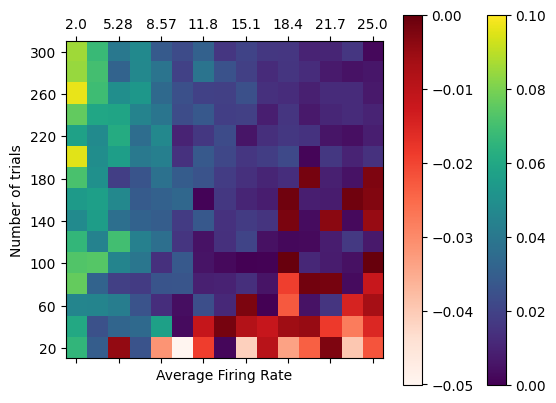

In [136]:
mask_sign = p_vals < 0.05
URI_signorm = URI_scores - surr_95s
URI_sign = URI_signorm.copy()
URI_sign[~mask_sign] = np.nan
URI_nons = URI_signorm.copy()
URI_nons[mask_sign] = np.nan

fig, ax = plt.subplots()
im1 = ax.matshow(URI_sign, origin="lower", norm=norm1)
im2 = ax.matshow(URI_nons, origin="lower", cmap="Reds", norm=norm2)
ax.set_yticks(range(len(nr_trials_ie))[::2], nr_trials_ie[::2])
labels = [str(i)[:4] for i in avg_FR_ie[::2]]
ax.set_xticks(range(len(avg_FR_ie))[::2], labels)
ax.set_xlabel("Average Firing Rate")
ax.set_ylabel("Number of trials")
plt.colorbar(im1)
plt.colorbar(im2)
plt.show()

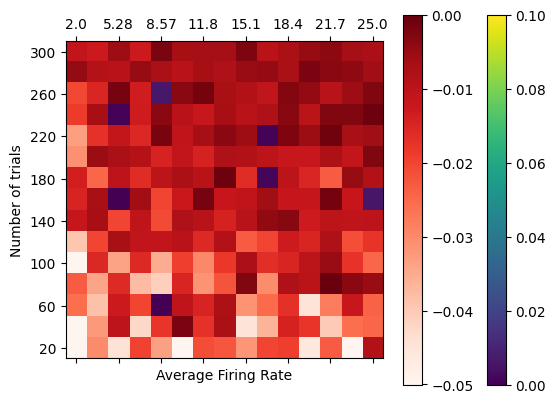

In [137]:
mask_sign = p_vals_ < 0.05
URI_signorm = URI_scores_ - surr_95s_
URI_sign = URI_signorm.copy()
URI_sign[~mask_sign] = np.nan
URI_nons = URI_signorm.copy()
URI_nons[mask_sign] = np.nan

fig, ax = plt.subplots()
im1 = ax.matshow(URI_sign, origin="lower", norm=norm1)
im2 = ax.matshow(URI_nons, origin="lower", cmap="Reds", norm=norm2)
ax.set_yticks(range(len(nr_trials_ie))[::2], nr_trials_ie[::2])
labels = [str(i)[:4] for i in avg_FR_ie[::2]]
ax.set_xticks(range(len(avg_FR_ie))[::2], labels)
ax.set_xlabel("Average Firing Rate")
ax.set_ylabel("Number of trials")
plt.colorbar(im1)
plt.colorbar(im2)
plt.show()

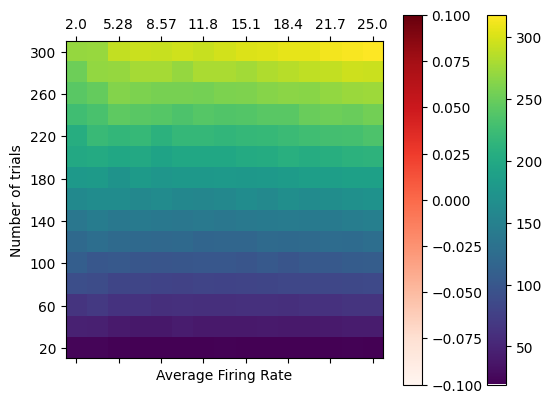

In [138]:
mask_sign = spikeship_pvals < 0.05

spikeship_sign = spikeship_tscores.copy()
spikeship_sign[~mask_sign] = np.nan
spikeship_nons = spikeship_tscores.copy()
spikeship_nons[mask_sign] = np.nan

fig, ax = plt.subplots()
im1 = ax.matshow(np.abs(spikeship_sign), origin="lower")
im2 = ax.matshow(spikeship_nons, origin="lower", cmap="Reds")
ax.set_yticks(range(len(nr_trials_ie))[::2], nr_trials_ie[::2])
labels = [str(i)[:4] for i in avg_FR_ie[::2]]
ax.set_xticks(range(len(avg_FR_ie))[::2], labels)
ax.set_xlabel("Average Firing Rate")
ax.set_ylabel("Number of trials")
plt.colorbar(im1)
plt.colorbar(im2)
plt.show()

## Number of trials with number of spikes in sequence

In [139]:
# Load results
URI_scores = np.load("Results/interaction2/URI_scores.npy")
p_vals = np.load("Results/interaction2/p_vals.npy")
surr_avgs = np.load("Results/interaction2/surr_avgs.npy")
surr_95s = np.load("Results/interaction2/surr_95s.npy")
URI_scores_ = np.load("Results/interaction2/URI_scores_.npy")
p_vals_ = np.load("Results/interaction2/p_vals_.npy")
surr_avgs_ = np.load("Results/interaction2/surr_avgs_.npy")
surr_95s_ = np.load("Results/interaction2/surr_95s_.npy")
spikeship_tscores = np.load("Results/interaction2/spikeship_tscores.npy")
spikeship_pvals = np.load("Results/interaction2/spikeship_pvals.npy")

In [140]:
nr_trials_ie = np.arange(20, 320, 20)
neurons_in_seq_ie = np.arange(2, 17)

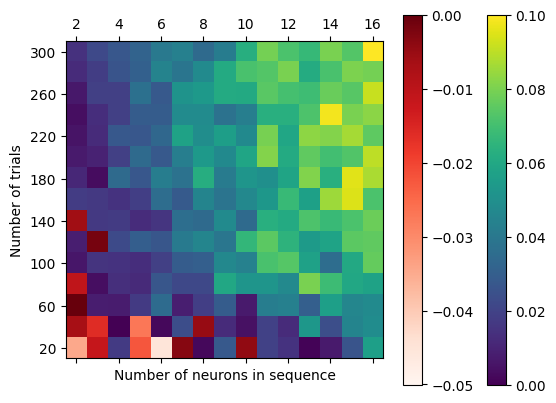

In [141]:
mask_sign = p_vals < 0.05
URI_signorm = URI_scores - surr_95s
URI_sign = URI_signorm.copy()
URI_sign[~mask_sign] = np.nan
URI_nons = URI_signorm.copy()
URI_nons[mask_sign] = np.nan

fig, ax = plt.subplots()
im1 = ax.matshow(URI_sign, origin="lower", norm=norm1)
im2 = ax.matshow(URI_nons, origin="lower", cmap="Reds", norm=norm2)
ax.set_yticks(range(len(nr_trials_ie))[::2], nr_trials_ie[::2])
ax.set_xticks(range(len(neurons_in_seq_ie))[::2], neurons_in_seq_ie[::2])
ax.set_xlabel("Number of neurons in sequence")
ax.set_ylabel("Number of trials")
plt.colorbar(im1)
plt.colorbar(im2)
plt.show()

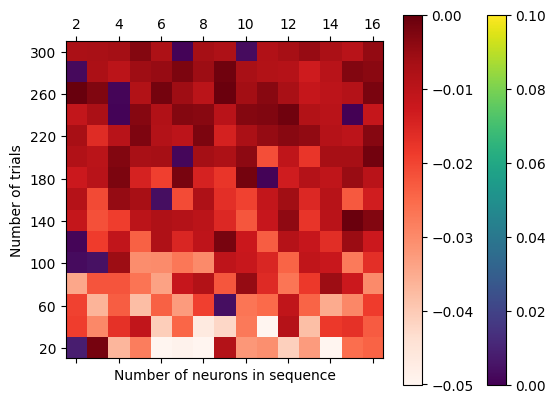

In [142]:
mask_sign = p_vals_ < 0.05
URI_signorm = URI_scores_ - surr_95s_
URI_sign = URI_signorm.copy()
URI_sign[~mask_sign] = np.nan
URI_nons = URI_signorm.copy()
URI_nons[mask_sign] = np.nan

fig, ax = plt.subplots()
im1 = ax.matshow(URI_sign, origin="lower", norm=norm1)
im2 = ax.matshow(URI_nons, origin="lower", cmap="Reds", norm=norm2)
ax.set_yticks(range(len(nr_trials_ie))[::2], nr_trials_ie[::2])
ax.set_xticks(range(len(neurons_in_seq_ie))[::2], neurons_in_seq_ie[::2])
ax.set_xlabel("Number of neurons in sequence")
ax.set_ylabel("Number of trials")
plt.colorbar(im1)
plt.colorbar(im2)
plt.show()

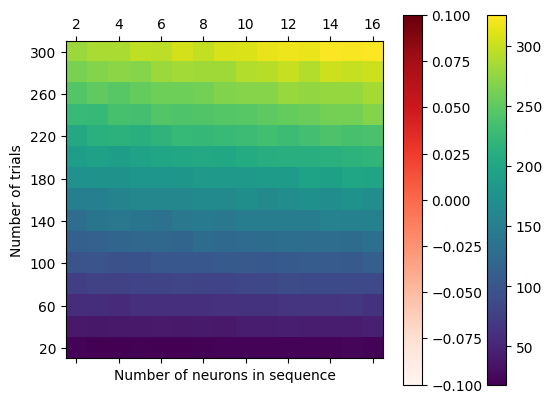

In [144]:
mask_sign = spikeship_pvals < 0.05

spikeship_sign = spikeship_tscores.copy()
spikeship_sign[~mask_sign] = np.nan
spikeship_nons = spikeship_tscores.copy()
spikeship_nons[mask_sign] = np.nan

fig, ax = plt.subplots()
im1 = ax.matshow(np.abs(spikeship_sign), origin="lower")
im2 = ax.matshow(np.abs(spikeship_nons), origin="lower", cmap="Reds")
ax.set_yticks(range(len(nr_trials_ie))[::2], nr_trials_ie[::2])
ax.set_xticks(range(len(neurons_in_seq_ie))[::2], neurons_in_seq_ie[::2])
ax.set_xlabel("Number of neurons in sequence")
ax.set_ylabel("Number of trials")
plt.colorbar(im1)
plt.colorbar(im2)
plt.show()

# Non-time-locked

## 1

In [145]:
# Load results
URIs = np.load("Results/NTL/URIs1.npy")
URI_pvals = np.load("Results/NTL/URI_pvals1.npy")
URIs_ = np.load("Results/NTL/URIs_1.npy")
URI_pvals_ = np.load("Results/NTL/URI_pvals_1.npy")
participating = np.load("Results/NTL/participating1.npy")

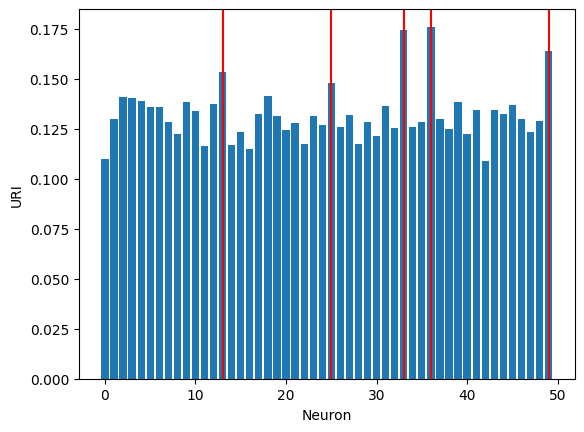

In [146]:
plt.figure()
plt.bar(range(len(URIs)), URIs)
for p in participating:
    plt.axvline(p, color='r')
plt.ylabel("URI")
plt.xlabel("Neuron")
plt.show()

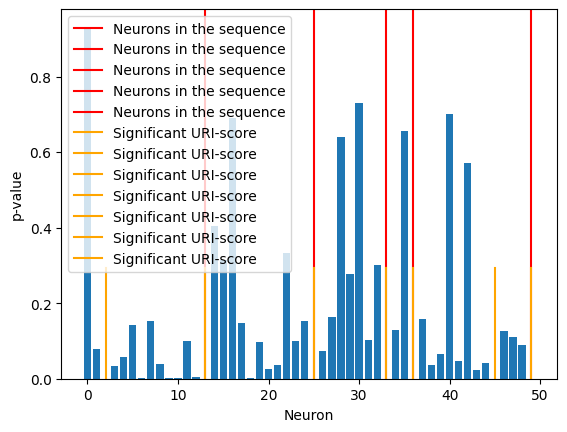

In [152]:
plt.figure()
plt.bar(range(50), URI_pvals)
for p in participating:
    plt.axvline(p, color='r', label='Neurons in the sequence')
for n in range(50):
    if URI_pvals[n] < (0.05 / 50):
        plt.axvline(n, color='orange', ymax=0.3, label='Significant URI-score')
plt.ylabel("p-value")
plt.xlabel("Neuron")
plt.legend()
plt.show()

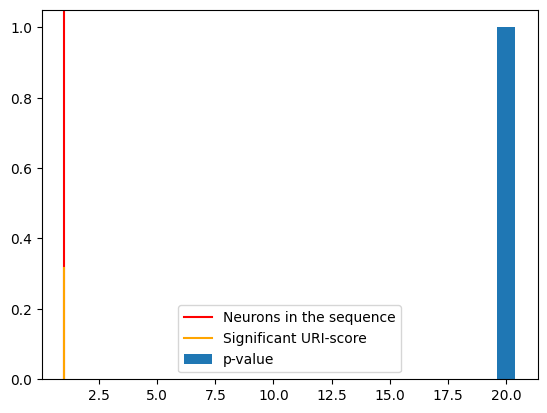

In [154]:
plt.figure()
plt.bar([20], [1], label='p-value')
plt.axvline(1, color='r', label='Neurons in the sequence')
plt.axvline(1, color='orange', ymax=0.3, label='Significant URI-score')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


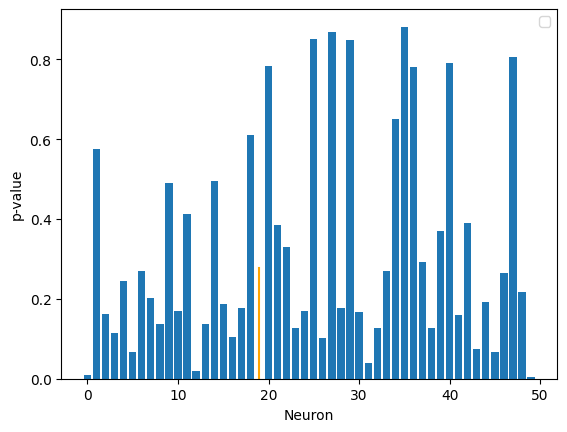

In [150]:
plt.figure()
plt.bar(range(len(URIs)), URI_pvals_)
for n in range(20):
    if URI_pvals_[n] < (0.05 / 50):
        plt.axvline(n, color='orange', ymax=0.3)
plt.ylabel("p-value")
plt.xlabel("Neuron")
plt.legend()
plt.show()

## 5

In [155]:
# Load results
URIs = np.load("Results/NTL/URIs5.npy")
URI_pvals = np.load("Results/NTL/URI_pvals5.npy")
URIs_ = np.load("Results/NTL/URIs_5.npy")
URI_pvals_ = np.load("Results/NTL/URI_pvals_5.npy")
participating = np.load("Results/NTL/participating5.npy")

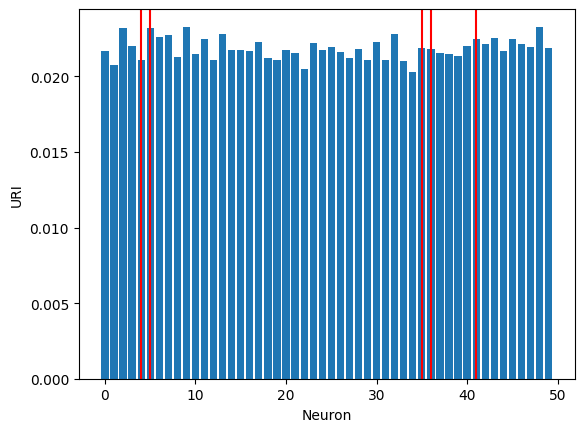

In [160]:
plt.figure()
plt.bar(range(len(URIs)), URIs)
for p in participating:
    plt.axvline(p, color='r')
plt.ylabel("URI")
plt.xlabel("Neuron")
plt.show()

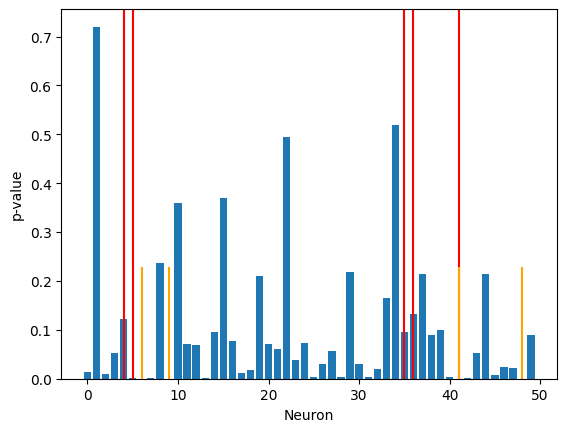

In [161]:
plt.figure()
plt.bar(range(50), URI_pvals)
for p in participating:
    plt.axvline(p, color='r', label='Neurons in the sequence')
for n in range(50):
    if URI_pvals[n] < (0.05 / 50):
        plt.axvline(n, color='orange', ymax=0.3, label='Significant URI-score')
plt.ylabel("p-value")
plt.xlabel("Neuron")
plt.show()

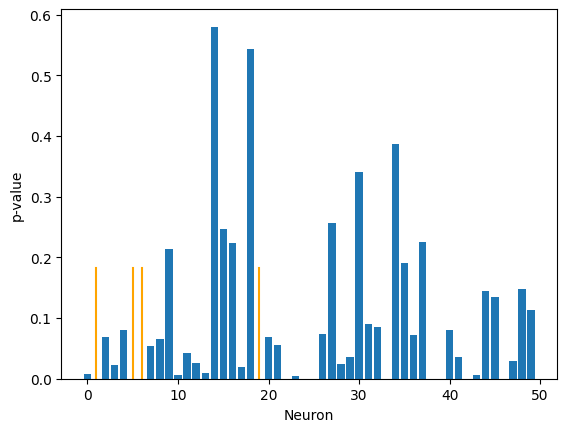

In [162]:
plt.figure()
plt.bar(range(len(URIs)), URI_pvals_)
for n in range(20):
    if URI_pvals_[n] < (0.05 / 50):
        plt.axvline(n, color='orange', ymax=0.3)
plt.ylabel("p-value")
plt.xlabel("Neuron")
plt.show()